In [ ]:
# 준비작업
## 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [30]:
## 데이터 로딩
faces = fetch_olivetti_faces()
X = faces.data  # 400개 이미지 x 4096개 픽셀
y = faces.target  # 40명의 사람 ID (0-39)
df = pd.DataFrame(X)

In [36]:
# 데이터 탐색 및 전처리
## 데이터 구조 확인
print(f"데이터 형태: {X.shape}")
print(f"이미지 수: {X.shape[0]}")
print(f"픽셀 수: {X.shape[1]}")
print(f"클래스 수: {len(np.unique(y))}")


## 요약통계량 계산
print(f"\n데이터 기본 통계:")
print(f"평균: {X.mean():.4f}")
print(f"표준편차: {X.std():.4f}")
print(f"최솟값: {X.min():.4f}")
print(f"최댓값: {X.max():.4f}")


## 데이터값 확인
df.head(10)

데이터 형태: (400, 4096)
이미지 수: 400
픽셀 수: 4096
클래스 수: 40

데이터 기본 통계:
평균: 0.5470
표준편차: 0.1725
최솟값: 0.0000
최댓값: 1.0000


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
5,0.549587,0.545455,0.541322,0.537190,0.537190,0.533058,0.528926,0.533058,0.590909,0.611570,...,0.623967,0.619835,0.623967,0.615702,0.661157,0.661157,0.690083,0.714876,0.706612,0.702479
6,0.330579,0.305785,0.330579,0.351240,0.425620,0.500000,0.603306,0.632231,0.644628,0.644628,...,0.516529,0.541322,0.541322,0.524793,0.537190,0.487603,0.190083,0.144628,0.152893,0.152893
7,0.128099,0.185950,0.247934,0.314050,0.388430,0.462810,0.520661,0.557851,0.590909,0.623967,...,0.289256,0.157025,0.165289,0.148760,0.157025,0.157025,0.152893,0.152893,0.173554,0.173554
8,0.243802,0.297521,0.367769,0.454545,0.495868,0.537190,0.578512,0.603306,0.611570,0.632231,...,0.702479,0.669421,0.537190,0.235537,0.169421,0.177686,0.190083,0.190083,0.181818,0.190083
9,0.380165,0.442149,0.483471,0.545455,0.582645,0.628099,0.648760,0.677686,0.690083,0.710744,...,0.132231,0.157025,0.165289,0.148760,0.165289,0.173554,0.173554,0.173554,0.173554,0.173554


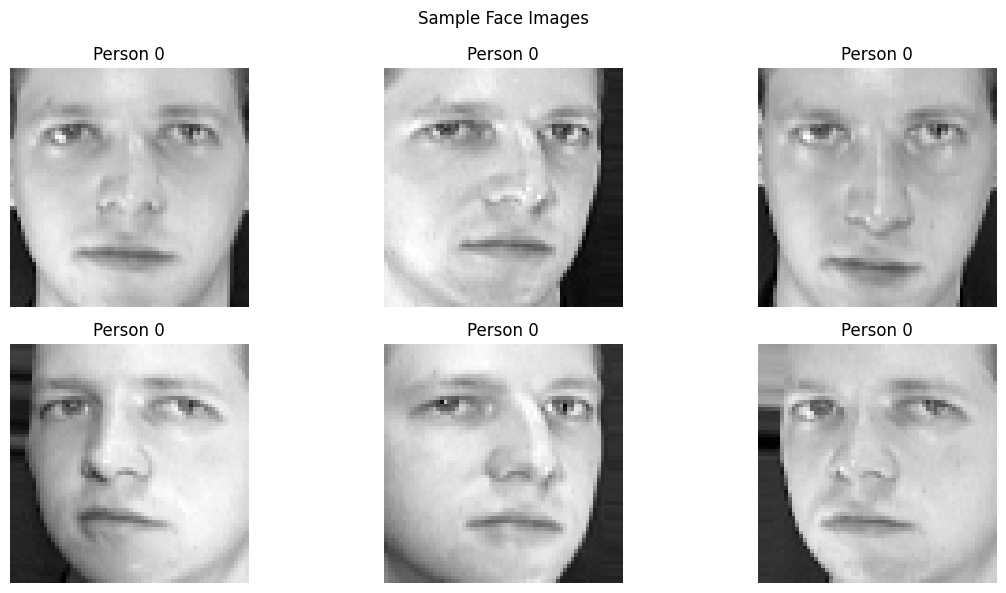

In [33]:
## 원데이터 시각화
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    # 픽셀 데이터를 64x64 이미지로 reshape
    image = X[i].reshape(64, 64)
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Person {y[i]}')
    ax.axis('off')
plt.suptitle('Sample Face Images')
plt.tight_layout()
plt.show()

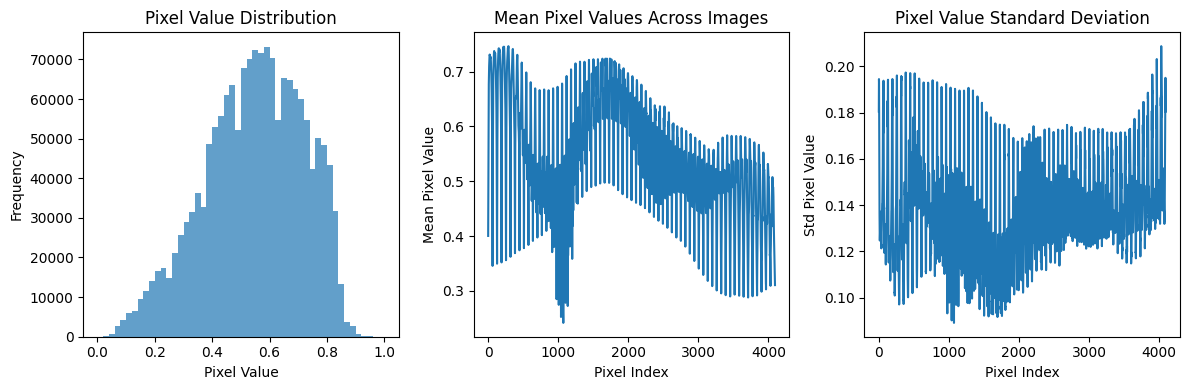

In [34]:
## 픽셀값 분포 확인
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.hist(X.flatten(), bins=50, alpha=0.7)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.plot(X.mean(axis=0))
plt.title('Mean Pixel Values Across Images')
plt.xlabel('Pixel Index')
plt.ylabel('Mean Pixel Value')

plt.subplot(133)
plt.plot(X.std(axis=0))
plt.title('Pixel Value Standard Deviation')
plt.xlabel('Pixel Index')
plt.ylabel('Std Pixel Value')

plt.tight_layout()
plt.show()

In [35]:
## 스케일링 : 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"스케일링 후 데이터 범위: [{X_scaled.min():.2f}, {X_scaled.max():.2f}]")

스케일링 후 데이터 범위: [-5.60, 4.91]


In [38]:
# 분석
## PCA 분석 수행
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print(f"PCA 변환 후 데이터 형태: {X_pca.shape}")
print(f"원본 특성 수: {X.shape[1]}")
print(f"주성분 수: {X_pca.shape[1]}")

PCA 변환 후 데이터 형태: (400, 400)
원본 특성 수: 4096
주성분 수: 400


In [46]:
## 결과통계량 확인
### 설명된 분산 비율
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("PCA 결과 요약:")
print(f"총 주성분 수: {len(explained_variance_ratio)}")
print(f"첫 번째 주성분 설명 분산: {explained_variance_ratio[0]:.4f} ({explained_variance_ratio[0]*100:.2f}%)")
print(f"두 번째 주성분 설명 분산: {explained_variance_ratio[1]:.4f} ({explained_variance_ratio[1]*100:.2f}%)")
print(f"세 번째 주성분 설명 분산: {explained_variance_ratio[2]:.4f} ({explained_variance_ratio[2]*100:.2f}%)")

### 주성분 벡터의 통계
print(f"\n주성분 벡터의 크기: {pca.components_.shape}")
print(f"각 주성분의 L2 norm: {np.linalg.norm(pca.components_, axis=1)[:5]}")

### 90%, 95% 분산을 설명하는 데 필요한 주성분 수
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"\n분산 설명을 위한 필요 주성분 수:")
print(f"90% 분산 설명: {n_components_90}개 성분")
print(f"95% 분산 설명: {n_components_95}개 성분")

PCA 결과 요약:
총 주성분 수: 400
첫 번째 주성분 설명 분산: 0.2688 (26.88%)
두 번째 주성분 설명 분산: 0.1234 (12.34%)
세 번째 주성분 설명 분산: 0.0784 (7.84%)

주성분 벡터의 크기: (400, 4096)
각 주성분의 L2 norm: [0.99999887 1.0000008  1.         0.9999997  0.99999946]

분산 설명을 위한 필요 주성분 수:
90% 분산 설명: 66개 성분
95% 분산 설명: 123개 성분


In [45]:
### 분산 설명 비율 확인
print("\nExplained Variance Ratio by Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({cumulative_variance_ratio[i]:.4f} cumulative)")
    
    # 누적 분산이 0.9를 넘으면 출력 중지
    if cumulative_variance_ratio[i] >= 0.9:
        break


Explained Variance Ratio by Component:
PC1: 0.2688 (0.2688 cumulative)
PC2: 0.1234 (0.3922 cumulative)
PC3: 0.0784 (0.4706 cumulative)
PC4: 0.0469 (0.5175 cumulative)
PC5: 0.0325 (0.5500 cumulative)
PC6: 0.0310 (0.5810 cumulative)
PC7: 0.0238 (0.6048 cumulative)
PC8: 0.0207 (0.6255 cumulative)
PC9: 0.0186 (0.6441 cumulative)
PC10: 0.0165 (0.6606 cumulative)
PC11: 0.0153 (0.6759 cumulative)
PC12: 0.0135 (0.6894 cumulative)
PC13: 0.0123 (0.7018 cumulative)
PC14: 0.0114 (0.7132 cumulative)
PC15: 0.0109 (0.7242 cumulative)
PC16: 0.0096 (0.7337 cumulative)
PC17: 0.0087 (0.7424 cumulative)
PC18: 0.0079 (0.7503 cumulative)
PC19: 0.0076 (0.7579 cumulative)
PC20: 0.0072 (0.7651 cumulative)
PC21: 0.0067 (0.7719 cumulative)
PC22: 0.0065 (0.7784 cumulative)
PC23: 0.0059 (0.7843 cumulative)
PC24: 0.0055 (0.7898 cumulative)
PC25: 0.0054 (0.7952 cumulative)
PC26: 0.0051 (0.8003 cumulative)
PC27: 0.0050 (0.8053 cumulative)
PC28: 0.0047 (0.8100 cumulative)
PC29: 0.0042 (0.8143 cumulative)
PC30: 0.0041

Text(0, 0.5, 'Explained Variance Ratio')

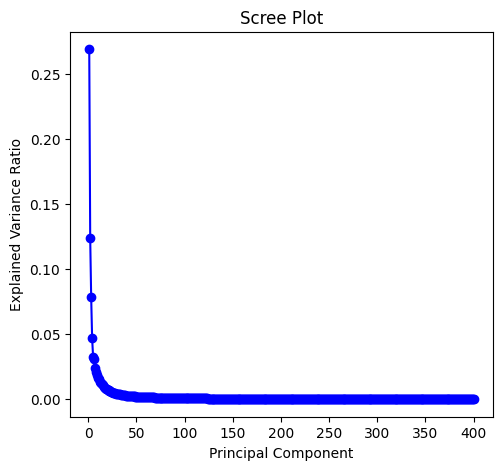

In [40]:
## 결과 시각화
### 스크리 플롯
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

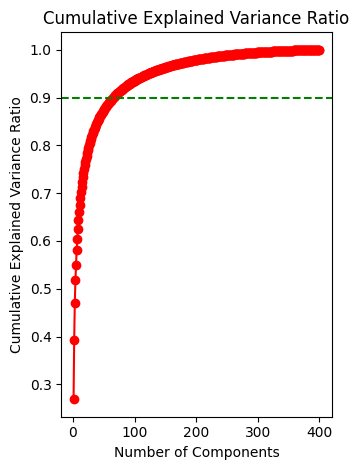

In [41]:
### 누적 분산 비율
plt.subplot(122)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.axhline(y=0.9, color='g', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

plt.tight_layout()
plt.show()

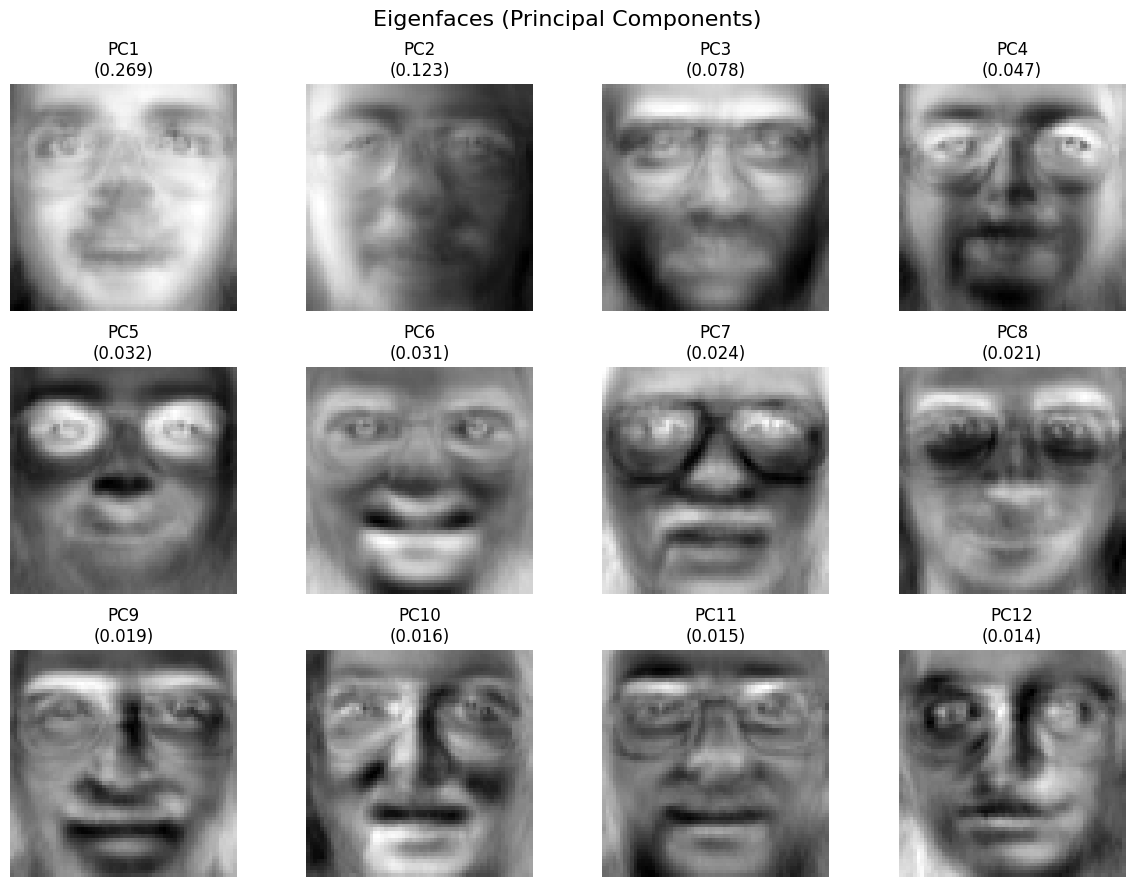

In [43]:
### eigenface
n_components_show = 12

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
for i, ax in enumerate(axes.flat):
    if i < n_components_show:
        # 주성분을 64x64 이미지로 reshape
        eigenface = pca.components_[i].reshape(64, 64)
        ax.imshow(eigenface, cmap='gray')
        ax.set_title(f'PC{i+1}\n({explained_variance_ratio[i]:.3f})')
    ax.axis('off')

plt.suptitle('Eigenfaces (Principal Components)', fontsize=16)
plt.tight_layout()
plt.show()

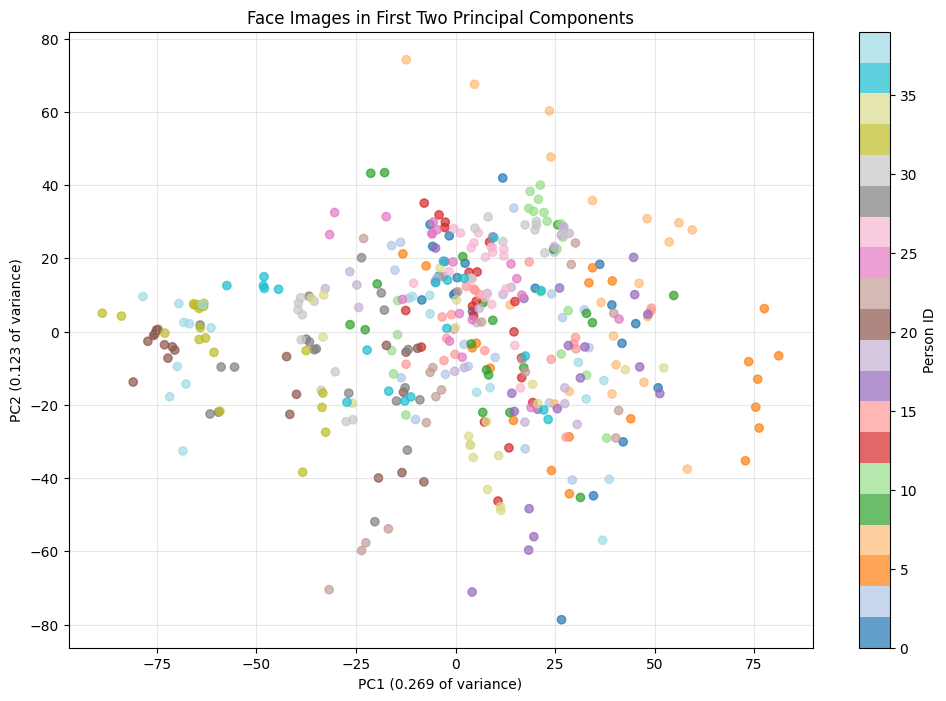

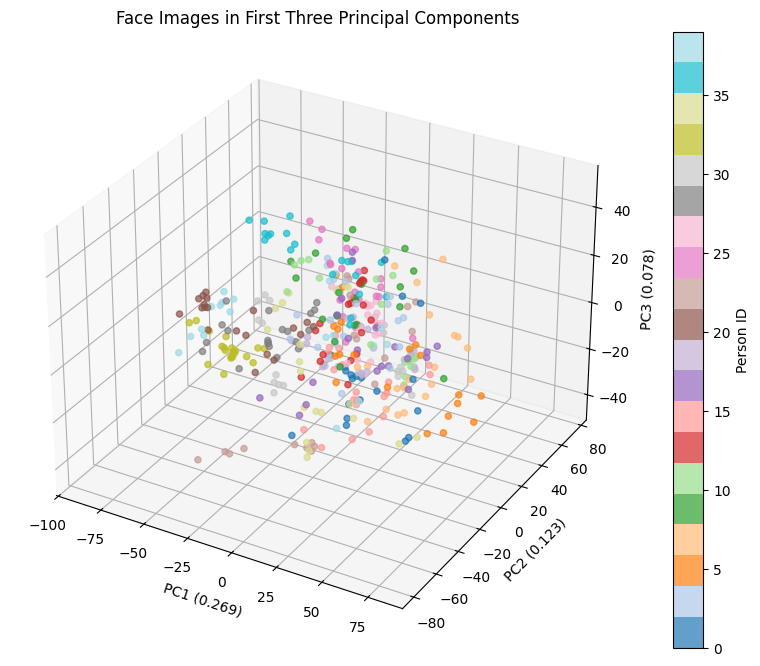

In [47]:
### PC1, PC2로 산점도 그리기
plt.figure(figsize=(12, 8))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab20', alpha=0.7)
plt.colorbar(scatter, label='Person ID')
plt.title('Face Images in First Two Principal Components')
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.3f} of variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.3f} of variance)')
plt.grid(True, alpha=0.3)
plt.show()

### 3D 시각화 (처음 3개 주성분)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='tab20', alpha=0.7)
ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]:.3f})')
ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]:.3f})')
ax.set_zlabel(f'PC3 ({explained_variance_ratio[2]:.3f})')
ax.set_title('Face Images in First Three Principal Components')
plt.colorbar(scatter, label='Person ID')
plt.show()

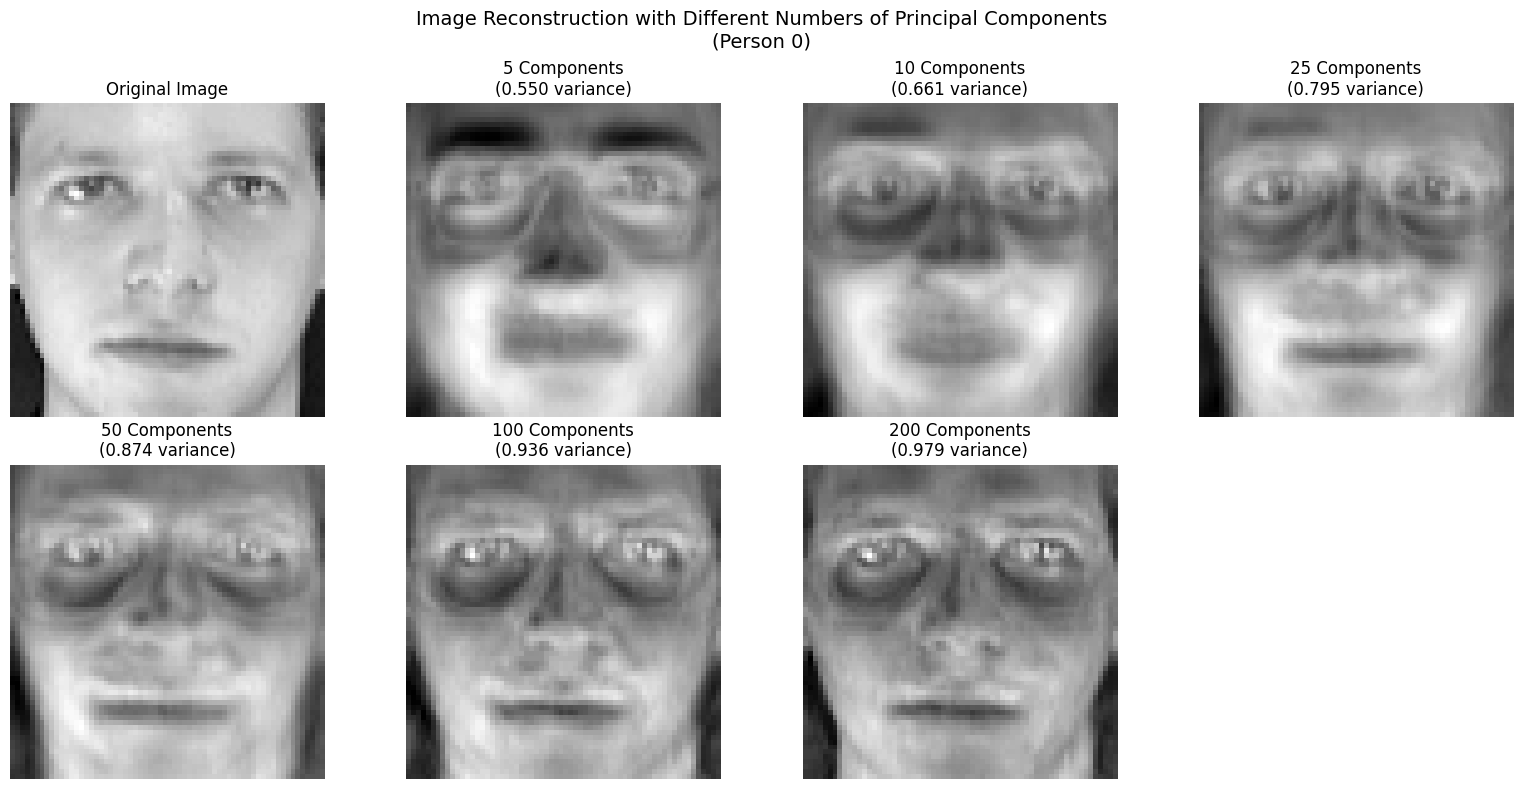

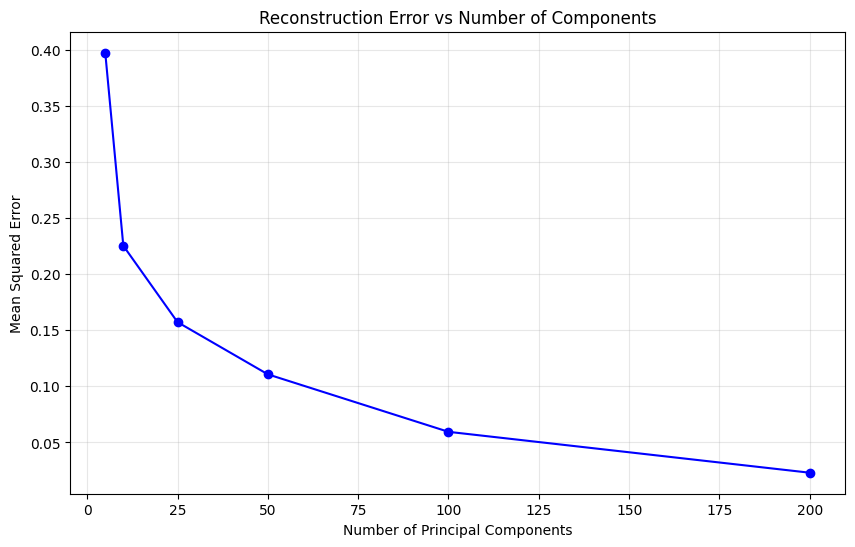

재구성 오차 (MSE):
  5 성분: MSE=0.397284, 설명된 분산=0.550
 10 성분: MSE=0.225272, 설명된 분산=0.661
 25 성분: MSE=0.157236, 설명된 분산=0.795
 50 성분: MSE=0.110714, 설명된 분산=0.874
100 성분: MSE=0.059478, 설명된 분산=0.936
200 성분: MSE=0.023040, 설명된 분산=0.979


In [48]:
### 일부 주성분을 이용한 이미지 재구성
def reconstruct_image(pca_model, X_scaled, n_components, image_idx=0):
    """주어진 개수의 주성분으로 이미지 재구성"""
    # 선택한 주성분 수만큼만 사용
    pca_reduced = PCA(n_components=n_components)
    X_pca_reduced = pca_reduced.fit_transform(X_scaled)
    X_reconstructed = pca_reduced.inverse_transform(X_pca_reduced)
    
    return X_reconstructed[image_idx]

sample_idx = 0  # 첫 번째 이미지 사용
component_counts = [5, 10, 25, 50, 100, 200] # 사용하는 주성분의 개수

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

original_image = X[sample_idx].reshape(64, 64) # 원본이미지
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# 주성분 값으로 이미지 재구성
for i, n_comp in enumerate(component_counts):
    reconstructed = reconstruct_image(pca, X_scaled, n_comp, sample_idx)
    reconstructed_image = reconstructed.reshape(64, 64)
    
    axes[i+1].imshow(reconstructed_image, cmap='gray')
    axes[i+1].set_title(f'{n_comp} Components\n({sum(explained_variance_ratio[:n_comp]):.3f} variance)')
    axes[i+1].axis('off')

# 마지막 subplot 제거
axes[-1].remove()

plt.suptitle(f'Image Reconstruction with Different Numbers of Principal Components\n(Person {y[sample_idx]})', fontsize=14)
plt.tight_layout()
plt.show()

# 재구성 오차 계산
reconstruction_errors = []
for n_comp in component_counts:
    reconstructed = reconstruct_image(pca, X_scaled, n_comp, sample_idx)
    mse = np.mean((X_scaled[sample_idx] - reconstructed) ** 2)
    reconstruction_errors.append(mse)

# 재구성 오차 시각화
plt.figure(figsize=(10, 6))
plt.plot(component_counts, reconstruction_errors, 'bo-')
plt.title('Reconstruction Error vs Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)
plt.show()

print("재구성 오차 (MSE):")
for n_comp, error in zip(component_counts, reconstruction_errors):
    variance_explained = sum(explained_variance_ratio[:n_comp])
    print(f"{n_comp:3d} 성분: MSE={error:.6f}, 설명된 분산={variance_explained:.3f}")

In [50]:
# t-SNE, ICA와 비교
## 라이브러리 로딩
from sklearn.manifold import TSNE
from sklearn.decomposition import FastICA
import time

In [53]:
## PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

## t-SNE
start_time = time.time()
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)
tsne_time = time.time() - start_time
print(f"t-SNE 수행시간: {tsne_time:.2f}초")

## Independent Component Analysis (ICA)
start_time = time.time()
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_scaled)
ica_time = time.time() - start_time
print(f"ICA 수행시간: {ica_time:.2f}초")

t-SNE 수행시간: 1.15초
ICA 수행시간: 0.09초


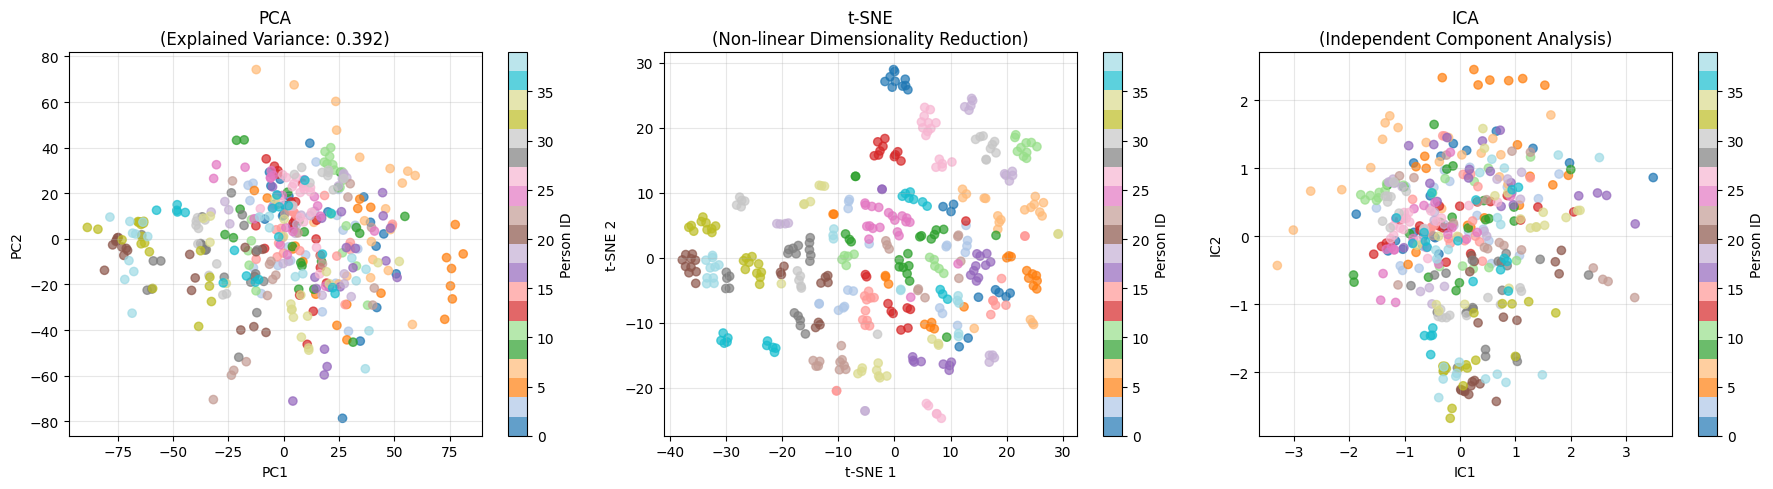

In [54]:
## 결과 비교를 위한 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

### PCA
scatter1 = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='tab20', alpha=0.7)
axes[0].set_title(f'PCA\n(Explained Variance: {pca_2d.explained_variance_ratio_.sum():.3f})')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True, alpha=0.3)

### t-SNE
scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab20', alpha=0.7)
axes[1].set_title('t-SNE\n(Non-linear Dimensionality Reduction)')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].grid(True, alpha=0.3)

### ICA
scatter3 = axes[2].scatter(X_ica[:, 0], X_ica[:, 1], c=y, cmap='tab20', alpha=0.7)
axes[2].set_title('ICA\n(Independent Component Analysis)')
axes[2].set_xlabel('IC1')
axes[2].set_ylabel('IC2')
axes[2].grid(True, alpha=0.3)

plt.colorbar(scatter1, ax=axes[0], label='Person ID')
plt.colorbar(scatter2, ax=axes[1], label='Person ID')
plt.colorbar(scatter3, ax=axes[2], label='Person ID')

plt.tight_layout()
plt.show()

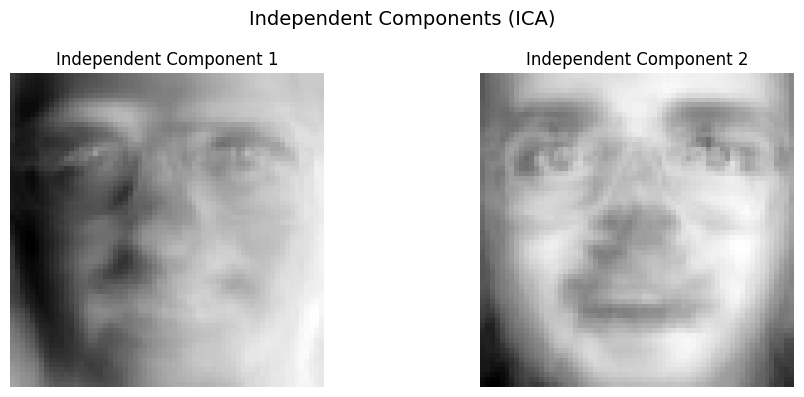

In [55]:
### ICA 성분을 eigenface처럼 시각화
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for i in range(2):
    component = ica.components_[i].reshape(64, 64)
    axes[i].imshow(component, cmap='gray')
    axes[i].set_title(f'Independent Component {i+1}')
    axes[i].axis('off')

plt.suptitle('Independent Components (ICA)', fontsize=14)
plt.tight_layout()
plt.show()

클러스터링 성능 비교 (실루엣 점수):
PCA:   0.4080
t-SNE: 0.4687
ICA:   0.4054

실제 라벨과의 일치도 (Adjusted Rand Index):
PCA:   0.1425
t-SNE: 0.4855
ICA:   0.1404


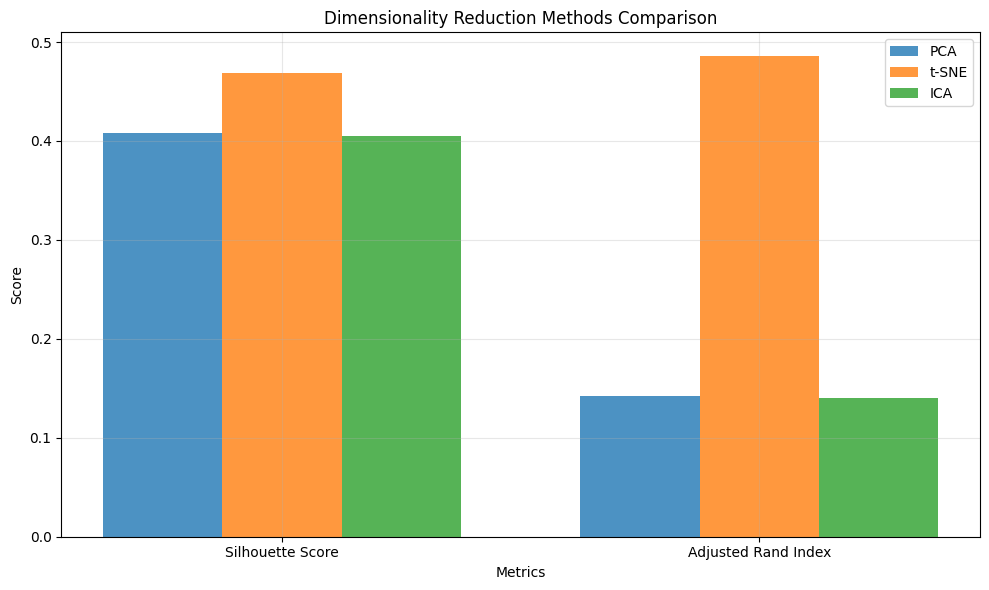

In [56]:
## 군집화를 통해 차원축소법 평가
### 라이브러리 로딩
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

#### ID 개수만큼 클러스터 수 설정
n_clusters = len(np.unique(y))

#### KMM 수행
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_tsne = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_ica = KMeans(n_clusters=n_clusters, random_state=42)

labels_pca = kmeans_pca.fit_predict(X_pca_2d)
labels_tsne = kmeans_tsne.fit_predict(X_tsne)
labels_ica = kmeans_ica.fit_predict(X_ica)

#### 실루엣 점수 계산
silhouette_pca = silhouette_score(X_pca_2d, labels_pca)
silhouette_tsne = silhouette_score(X_tsne, labels_tsne)
silhouette_ica = silhouette_score(X_ica, labels_ica)

print("클러스터링 성능 비교 (실루엣 점수):")
print(f"PCA:   {silhouette_pca:.4f}")
print(f"t-SNE: {silhouette_tsne:.4f}")
print(f"ICA:   {silhouette_ica:.4f}")

#### 실제 라벨과의 일치도 확인 (Adjusted Rand Index)
ari_pca = adjusted_rand_score(y, labels_pca)
ari_tsne = adjusted_rand_score(y, labels_tsne)
ari_ica = adjusted_rand_score(y, labels_ica)

print("\n실제 라벨과의 일치도 (Adjusted Rand Index):")
print(f"PCA:   {ari_pca:.4f}")
print(f"t-SNE: {ari_tsne:.4f}")
print(f"ICA:   {ari_ica:.4f}")

#### 성능 비교 막대 그래프
metrics = ['Silhouette Score', 'Adjusted Rand Index']
pca_scores = [silhouette_pca, ari_pca]
tsne_scores = [silhouette_tsne, ari_tsne]
ica_scores = [silhouette_ica, ari_ica]

x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, pca_scores, width, label='PCA', alpha=0.8)
ax.bar(x, tsne_scores, width, label='t-SNE', alpha=0.8)
ax.bar(x + width, ica_scores, width, label='ICA', alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Dimensionality Reduction Methods Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [58]:
# 분석 결과 리포트

print(f"\n1. 데이터 특성:")
print(f"   - 총 이미지 수: {X.shape[0]}")
print(f"   - 픽셀 수 (차원): {X.shape[1]}")
print(f"   - 사람 수: {len(np.unique(y))}")
print(f"   - 차원 대비 샘플 비율: {X.shape[0]/X.shape[1]:.4f} (n/p)")

print(f"\n2. 주성분 분석 결과:")
cumsum_var = np.cumsum(explained_variance_ratio)
n_components_95 = np.argmax(cumsum_var >= 0.95) + 1
n_components_90 = np.argmax(cumsum_var >= 0.90) + 1

print(f"   - 90% 분산 설명: {n_components_90}개 성분 ({n_components_90/X.shape[1]*100:.1f}%)")
print(f"   - 95% 분산 설명: {n_components_95}개 성분 ({n_components_95/X.shape[1]*100:.1f}%)")
print(f"   - 첫 10개 성분으로 설명: {cumsum_var[9]:.4f} ({cumsum_var[9]*100:.1f}%)")

print(f"\n3. 차원축소 효과:")
original_size = X.shape[1]
reduced_size_90 = n_components_90
reduced_size_95 = n_components_95
compression_90 = (1 - reduced_size_90/original_size) * 100
compression_95 = (1 - reduced_size_95/original_size) * 100

print(f"   - 90% 정보 유지시 압축률: {compression_90:.1f}%")
print(f"   - 95% 정보 유지시 압축률: {compression_95:.1f}%")

print(f"\n4. 주요 eigenface 특성:")
print(f"   - 첫 번째 eigenface: 전체적인 얼굴 평균 패턴")
print(f"   - 두 번째 eigenface: 조명 방향의 차이")
print(f"   - 세 번째 eigenface: 얼굴 각도 및 표정 차이")

# 메모리 사용량 비교
original_memory = X.nbytes / (1024**2)  # MB
reduced_memory_95 = (X.shape[0] * n_components_95 * 8) / (1024**2)  # float64 가정

print(f"\n5. 메모리 효율성:")
print(f"   - 원본 데이터: {original_memory:.2f} MB")
print(f"   - 95% 압축 후: {reduced_memory_95:.2f} MB")
print(f"   - 메모리 절약: {(1-reduced_memory_95/original_memory)*100:.1f}%")

print("="*60)


1. 데이터 특성:
   - 총 이미지 수: 400
   - 픽셀 수 (차원): 4096
   - 사람 수: 40
   - 차원 대비 샘플 비율: 0.0977 (n/p)

2. 주성분 분석 결과:
   - 90% 분산 설명: 66개 성분 (1.6%)
   - 95% 분산 설명: 123개 성분 (3.0%)
   - 첫 10개 성분으로 설명: 0.6606 (66.1%)

3. 차원축소 효과:
   - 90% 정보 유지시 압축률: 98.4%
   - 95% 정보 유지시 압축률: 97.0%

4. 주요 eigenface 특성:
   - 첫 번째 eigenface: 전체적인 얼굴 평균 패턴
   - 두 번째 eigenface: 조명 방향의 차이
   - 세 번째 eigenface: 얼굴 각도 및 표정 차이

5. 메모리 효율성:
   - 원본 데이터: 6.25 MB
   - 95% 압축 후: 0.38 MB
   - 메모리 절약: 94.0%
